In [1]:
import SimpleITK as sitk

In [2]:
def loadFile(filename):
    ds = sitk.ReadImage(filename)
    img_array = sitk.GetArrayFromImage(ds)
    return img_array

In [3]:
from os import walk
pet = []
for (dirpath, dirnames, filenames) in walk("."):
    if "PET" in dirpath and "RTstruct" not in dirpath and "RTStruct" not in dirpath and "AC" in dirpath and "ipy" not in dirpath:
        pet.append(dirpath)
pet = sorted(pet)

In [4]:
from os import walk
ct = []
for (dirpath, dirnames, filenames) in walk("."):
    if "PET" in dirpath and "RTstruct" not in dirpath and "RTStruct" not in dirpath and "AC" not in dirpath and "ipy" not in dirpath and "0000" in dirpath:
        ct.append(dirpath)
ct = sorted(ct)

In [5]:
del ct[45]
del pet[45]

In [6]:
import numpy as np
idx_array = np.load("idx_list.npy",allow_pickle=True)

In [7]:
from pydicom import dcmread

In [8]:
import matplotlib.pyplot as plt
import cv2
from os import listdir
from os.path import isfile, join

ct_list = list()
pet_list = list()
count = 0
for ct_path, pet_path in zip(ct, pet):
    ct_file_list = sorted([f for f in listdir(ct_path) if isfile(join(ct_path, f))], reverse=True)
    
    pet_file_list = sorted([f for f in listdir(pet_path) if isfile(join(pet_path, f))], reverse=True)
#     print(len(ct_file_list),len(pet_file_list))
#     series_data = []
#     for f in pet_file_list:
#         series_data.append([f,dcmread(pet_path+"/"+f)])
#     series_data.sort(key=lambda ds: ds[1].SliceLocation, reverse=False)

    ct_sub_list = list()
    pet_sub_list = list()
    for idx in idx_array[count]:
        
        pet_img_path = pet_file_list[idx]
        
        if "dcm" in pet_img_path:
            pet_img = loadFile(pet_path + "/"+pet_img_path)            
#             img = cv2.resize(img.reshape(512,512).astype('float32'),(128,128))
            pet_sub_list.append(pet_img.reshape(128,128).astype('float32'))

        ct_img_path = ct_file_list[idx]
        if "dcm" in ct_img_path:           
            ct_img = loadFile(ct_path + "/"+ct_img_path)           
            ct_img = cv2.resize(ct_img.reshape(512,512).astype('float32'),(128,128))
            ct_sub_list.append(ct_img)
    ct_list.append(ct_sub_list)
    pet_list.append(pet_sub_list)
    count += 1

In [9]:
np.save("ct", np.array(ct_list))
np.save("pet", np.array(pet_list))

/Users/chengshen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/Users/chengshen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [10]:
idx_array = np.load("idx_list.npy",allow_pickle=True)

In [11]:
masks_array  =  np.load("masks.npy",allow_pickle=True)

In [12]:
ct_array = np.load("ct.npy",allow_pickle=True)

In [13]:
pet_array = np.load("pet.npy",allow_pickle=True)

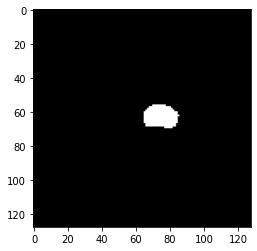

In [43]:
import matplotlib.pyplot as plt
plt.imshow(masks_array[15][10], cmap="gray")

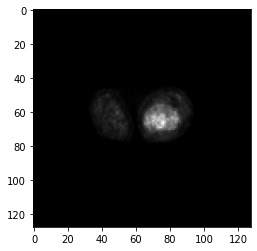

In [44]:
plt.imshow(pet_array[15][10],cmap="gray")

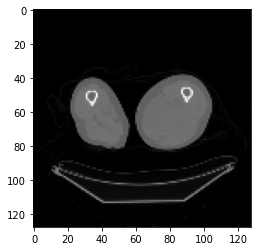

In [46]:
plt.imshow(ct_array[15][10],cmap="gray")